In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


In [ ]:
movies = pd.read_csv('movies.csv', usecols=['movieId'], dtype={'movieId':'int32'})
ratings = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'], dtype={'userId':'int32', 'movieId':'int32', 'rating':'float32'})

In [ ]:
movies.head()

,movieId
0,1
1,2
2,3
3,4
4,5


In [ ]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
movies = ratings.merge(movies)

In [ ]:
movies.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
dtypes: float32(1), int32(2)
memory usage: 1.9 MB


In [ ]:
movies.shape

(100836, 3)

In [ ]:
movies.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [ ]:

movies.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [ ]:
movies.shape

(100836, 3)

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

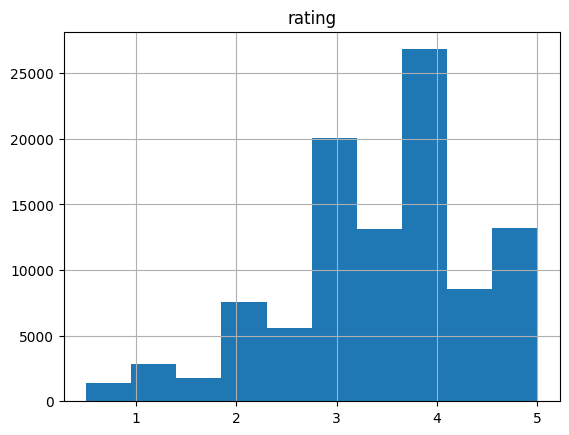

In [ ]:
#x: représenterait les différentes valeurs d'évaluations possibles
#y:représenterait le nombre de films ayant reçu chaque évaluation.

movies.hist('rating',bins = 10)

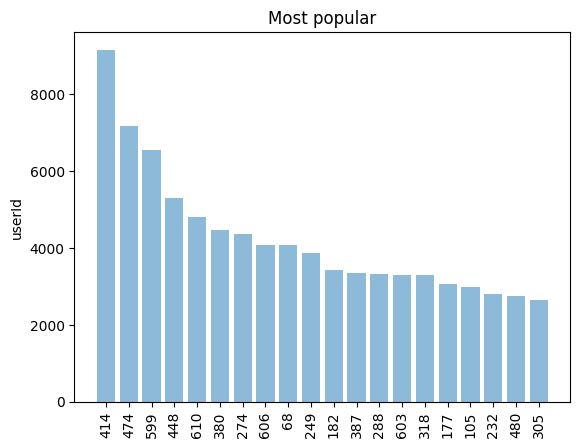

In [ ]:
#x: userId
#y: la somme des évaluations (ratings) attribuées par chaque utilisateur.

popular = movies[['userId','rating']].groupby('userId').sum().reset_index()
popular_20 = popular.sort_values('rating', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
objects = (list(popular_20['userId']))
y_pos = np.arange(len(objects))
performance = list(popular_20['rating'])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userId')
plt.title('Most popular')
plt.show()


In [ ]:
movies.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
431      20
194      20
257      20
207      20
189      20
Name: userId, Length: 610, dtype: int64

In [ ]:
print('Number of unique users:', len(movies['userId'].unique()))

Number of unique users: 610


In [ ]:
print('Number of unique movies:', len(movies['movieId'].unique()))

Number of unique movies: 9724


In [ ]:
print('Unique Ratings:', movies['rating'].unique())

Unique Ratings: [4.  4.5 2.5 3.5 3.  5.  0.5 2.  1.5 1. ]


In [ ]:
min_ratings1 = movies[(movies['rating'] < 2.0)]
print('Number of unique movies rated low:',len(min_ratings1['movieId'].unique()))

Number of unique movies rated low: 3025


In [ ]:
med_ratings1 = movies[(movies['rating'] > 2.0) & (movies['rating'] < 4.0)]
print('Number of unique movies rated medium:',len(med_ratings1['movieId'].unique()))

Number of unique movies rated medium: 6971


In [ ]:
max_ratings1 = movies[movies['rating'] >= 4.0]
print('Number of unique movies rated high:',len(max_ratings1['movieId'].unique()))

Number of unique movies rated high: 6298


In [ ]:
avg_rating_movie = movies.groupby('movieId').sum() / movies.groupby('movieId').count()
avg_rating_movie.drop('userId', axis=1,inplace =True)
print ('Top 10 highly rated movies\n',avg_rating_movie.nlargest(10,'rating'))

Top 10 highly rated movies
          rating
movieId        
53          5.0
99          5.0
148         5.0
467         5.0
495         5.0
496         5.0
626         5.0
633         5.0
876         5.0
1140        5.0


# Prendre un sous-ensemble du dataframe


In [ ]:
userId = movies.groupby('userId').count()
top_user = userId[userId['rating'] >= 50].index
topuser_ratings_df = movies[movies['userId'].isin(top_user)]
topuser_ratings_df.shape

(93812, 3)

In [ ]:
topuser_ratings_df.head()

,userId,movieId,rating
0,1,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
5,18,1,3.5


In [ ]:
topuser_ratings_df.sort_values(by='rating', ascending=False).head()

,userId,movieId,rating
70016,244,1233,5.0
75406,64,3362,5.0
75537,39,3019,5.0
75535,39,2342,5.0
14890,380,3033,5.0


# Garder les données uniquement pour les films qui ont 50 évaluations ou plus

In [ ]:
movieId = movies.groupby('movieId').count()
top_movie = movieId[movieId['rating'] >= 50].index
top_ratings_df = topuser_ratings_df[topuser_ratings_df['movieId'].isin(top_movie)]
top_ratings_df.sort_values(by='rating', ascending=False).head()

,userId,movieId,rating
42608,119,72998,5.0
6658,76,1136,5.0
49256,603,1252,5.0
6767,580,1136,5.0
14631,135,2987,5.0


In [ ]:
top_ratings_df.shape

(37117, 3)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=0)

In [ ]:
train_data.head()

,userId,movieId,rating
23112,280,2762,4.5
17343,177,71535,5.0
45318,217,172,3.0
53751,599,6378,2.5
1349,534,223,4.0


In [ ]:
test_data.head()

,userId,movieId,rating
34375,318,1682,4.5
37067,123,5952,3.5
1849,57,296,3.0
12048,413,2353,5.0
22681,339,2324,5.0


In [ ]:
train_data_grouped = train_data.groupby('movieId').mean().reset_index()
train_data_grouped.head()

,movieId,userId,rating
0,1,301.624000,3.936000
1,2,345.240000,3.440000
2,3,254.333333,3.166667
3,6,331.777778,3.880952
4,7,283.333333,2.937500


In [ ]:
train_data_sort = train_data_grouped.sort_values(['rating', 'movieId'], ascending=False)
train_data_sort.head()

,movieId,userId,rating
53,318,297.269461,4.374251
241,2329,294.615385,4.301282
118,858,300.826087,4.300000
166,1252,305.756757,4.297297
171,1276,239.882353,4.294117


In [ ]:
train_data.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)

movieId
356     181
296     168
318     167
593     160
2571    156
260     151
480     137
110     130
2959    130
1198    126
Name: rating, dtype: int64

In [ ]:
ratings_mean_count = pd.DataFrame(train_data.groupby('movieId')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('movieId')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
movieId,,
1,3.936000,125
2,3.440000,75
3,3.166667,30
6,3.880952,63
7,2.937500,24


In [ ]:
pred_df = test_data[['userId', 'movieId', 'rating']]
pred_df.rename(columns = {'rating' : 'true_ratings'}, inplace=True)
pred_df = pred_df.merge(train_data_sort, left_on='movieId', right_on = 'movieId')
pred_df.head(3)

,userId_x,movieId,true_ratings,userId_y,rating
0,318,1682,4.5,296.116883,3.798701
1,484,1682,4.0,296.116883,3.798701
2,608,1682,4.5,296.116883,3.798701


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162671 sha256=8bde093096b7a3d8e7a6577f7636ef59f86c75854fc19f42a87e40af398069ef
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy


In [ ]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [ ]:
pred_df.rename(columns = {'rating' : 'predicted_ratings'}, inplace = True)

In [ ]:
pred_df.head()

,userId_x,movieId,true_ratings,userId_y,predicted_ratings
0,318,1682,4.5,296.116883,3.798701
1,484,1682,4.0,296.116883,3.798701
2,608,1682,4.5,296.116883,3.798701
3,339,1682,4.5,296.116883,3.798701
4,483,1682,3.5,296.116883,3.798701


In [ ]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 0.9247960510172893


In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))

In [ ]:
data = Dataset.load_from_df(top_ratings_df[['userId', 'movieId', 'rating']],reader)

In [ ]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [ ]:
type(trainset)

surprise.trainset.Trainset

# Entraînement du modèle


In [ ]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


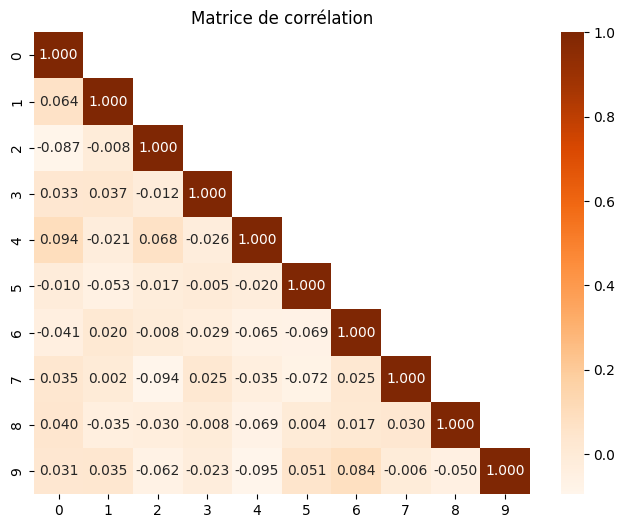

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sim_matrix = algo_user.sim
num_users_to_visualize = 10
user_indices_to_visualize = np.array(trainset.all_users())[:num_users_to_visualize]
sim_matrix_subset = sim_matrix[:num_users_to_visualize, :num_users_to_visualize]
for i in range(num_users_to_visualize):
    for j in range(i + 1, num_users_to_visualize):
        sim_matrix_subset[i, j] = np.nan

plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix_subset, annot=True, fmt=".3f", cmap = "Oranges", xticklabels=user_indices_to_visualize, yticklabels=user_indices_to_visualize)
plt.title("Matrice de corrélation")
plt.show()


#SVD

In [ ]:
svd_model = SVD(n_factors=15,reg_all=0.02)
svd_model.fit(trainset)

# Évaluer les deux modèles.


### Modèle de recommandation de popularité (RMSE)

In [ ]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 0.9247960510172893


### Modèle de recommandation de filtrage collaboratif(RMSE)

In [ ]:
print(len(testset))
type(testset)

11136


list

### KNNWithMeans

In [ ]:
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid=91, iid=2987, r_ui=4.0, est=3.6322321459638816, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
accuracy.rmse(test_pred)

RMSE: 0.8349


0.834866966620496

In [ ]:
test_pred = svd_model.test(testset)

In [ ]:
accuracy.rmse(test_pred)

RMSE: 0.8360


0.8360009333423156

### Ajustement des paramètres du système de recommandation SVD

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [ ]:
gs.fit(data)

In [ ]:
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.01}}

In [ ]:
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.7989


0.7989325732701528

In [ ]:
from collections import defaultdict
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [ ]:
top_n = get_top_n(test_pred, n=5)

In [ ]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

91 [318, 912, 1196, 904, 1136]
573 [2959, 1136, 1148, 2571, 1193]
434 [750, 7361, 296, 593, 6016]
460 [48516, 2571, 356, 4993, 34405]
288 [912, 1198, 1136, 4226, 296]
597 [904, 260, 2542, 1222, 1288]
416 [260, 1196, 2571, 608, 2997]
391 [1197, 1148, 1221, 2959, 1617]
608 [296, 858, 7361, 593, 50]
432 [48516, 1206, 4995, 58559, 48780]
428 [2959, 2571, 2329, 2858, 541]
307 [1197, 4226, 904, 6016, 8874]
83 [2324, 4973, 7153, 2028, 58559]
177 [1196, 6016, 1213, 1225, 1203]
586 [318, 858, 1198, 2028, 1210]
489 [4993, 4973, 1230, 1089, 7361]
309 [318, 296, 1213, 1203, 5952]
411 [1, 223, 161, 353, 597]
387 [858, 1136, 260, 912, 904]
339 [750, 318, 1193, 908, 1221]
558 [593, 2028, 1259, 4306, 4886]
510 [750, 527, 1247, 593, 1225]
584 [593, 457, 110, 1, 34]
464 [858, 1196, 593, 4226, 7153]
466 [260, 356, 2571, 60069, 58559]
63 [356, 1210, 5618, 1704, 60069]
599 [318, 4973, 2959, 4993, 1148]
346 [4973, 912, 1193, 1252, 778]
514 [1193, 356, 2028, 74458, 2571]
322 [858, 1199, 46578, 4011, 58559]
3